# Perkenalan

Dibuat Oleh Arry Pandowo Student Hacktiv8 Fullstack Data Science Batch 1

Dataset yagn digunakan adalah sebagai berikut [dimari](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) yang merupakan data telemarketing untuk menjual deposito jangka panjang, dengan output yes and no dari masing masing phone call yang dilakukan

> Tujuan dari tugas ini adalah menentukan model yang ingin dipilih beserta dengan proses pencarian serta evidence atas pemilihan model tersebut

# Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn import preprocessing, svm, linear_model, metrics, pipeline, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score


All the library and stuff, dibawah masih ada beberapa yagn baru disusulin karna pada proses penyusunan banyak dilakukan trial and error

# Data Loading

In [3]:
df = pd.read_csv(('data/bank-additional/bank-additional-full.csv'), sep= ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Data yang akan digunakan dengan informasi sebagai berikut

Informasi Awal :
* Tidak ada Data Null

<AxesSubplot:>

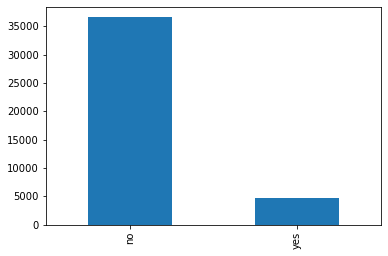

In [4]:
df['y'].value_counts().plot(kind='bar')

> Data target memiliki sebaran yang tidak merata antar class, dapat mengakibatkan model memiliki akurasi yang buruk, perlu dilakukan pengolahan lebih lanjut pada tahapan preprocessing dan akan dilakukan eksplorasi lebih lanjut pada tahapan Eksplorasi Data

# Data Cleaning

## Analisa sederhana korelasi antar data

Atas list data diatas maka kita kembali melihat deskripsi data yg diberikan oleh UCI : 

Deksrpsi data pada website UCI

### **Input Variable**
<li>Age</li>
age 
(numeric)
<li>Job</li>
type of job 
( <em>categorical</em> : 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
<li>Marital</li>
marital status 
(<em>categorical</em>: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<li>Education</li>
(<em>categorical</em>: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<li>default</li>
has credit in default? 
(<em>categorical</em>: 'no','yes','unknown')
<li>Housing</li>
has housing loan? 
(<em>categorical</em>: 'no','yes','unknown')
<li>Loan</li>
(<em>categorical</em>: 'no','yes','unknown')

### **related with the last contact of the current campaign:**
<li>contact</li>
contact communication type 
(<em>categorical</em>: 'cellular','telephone')
<li>Month</li>
last contact month of year 
(<em>categorical</em>: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<li>day_of_week</li>
last contact day of the week 
(<em>categorical</em>: 'mon','tue','wed','thu','fri')
<li>duration</li>
last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
</ul>

### **other attributes**
<li>campaign:</li>
number of contacts performed during this campaign and for this client (numeric, includes last contact)
<li>pdays</li>
number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<li>Previous</li>
number of contacts performed before this campaign and for this client (numeric)
<li>poutcome</li>
outcome of the previous marketing campaign 
(<em>categorical</em>: 'failure','nonexistent','success')

### **social and economic context attributes**
<li>emp.var.rate</li>
employment variation rate - quarterly indicator (numeric)
<li>cons.price.idx</li>
consumer price index - monthly indicator (numeric)
<li>cons.conf.idx</li>
consumer confidence index - monthly indicator (numeric)
<li>euribor3m:</li>
euribor 3 month rate - daily indicator (numeric)
<li>nr.employed</li>
number of employees - quarterly indicator (numeric)

berdasarkan deskripsi data maka:
* Month dan day_of_week akan di keluarkan dari dataset dikarenakan hanya memberikan informasi atas list dari bulan dan hari ketika dilaksanakannya kontak terakhir dengan calon client
* atas keterangan pada dataset kolom duration, maka duration dikeluarkan juga dikarenakan target dari model ini adalah sebuah predictive model
* perlu dilakukan manipulasi data atas kolom pdays dikarenakan adanya kode 999 sebagai pertanda client tersebut belom dihubungi sebelumnya

## Tindakan atas analisa sederhana

### Drop 3 feature

In [5]:
df = df.drop(['day_of_week', 'month', 'duration'], axis=1)

### Penyesuaian Kolom Pdays

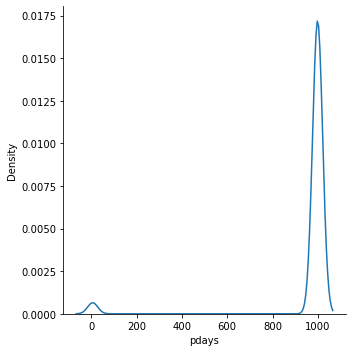

In [6]:
sns.displot(data=df , x="pdays", kind="kde")

Sebaran data tidak merata sehingga diperlukan penyesuaian dengan melakukan replacement terhadap data 999 menjadi mean dari data pdays diluar dari data 999

In [7]:
no999 = df[df.pdays != 999]
no999['pdays'].mean()

6.014521452145215

Nilai mean yang akan menjadi replacement adalah 6

In [8]:
df['pdays'] = df['pdays'].replace([999], 6)

### Penyetaraan social and economic context terhadap skala waktu

berdasarkan deskripsi data social economic context masih memiliki indikator yang berdbeda beda, maka dilakukan penyetaraan menjadi bulanan agar tidak mempengaruhi hasil, dengan asumsi satu bulan 30 hari 

In [9]:
df['emp.var.rate'] = df['emp.var.rate']/3    # convert dari quarterly ke monthly
df['euribor3m'] = df['euribor3m']/30    # convert dari daily ke monthly

# Eksplorasi Data

## Visualisasi hubungan antar variable 

In [10]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1      6         0  nonexistent      0.366667          93.994   
1         1      6         0  nonexistent      0.366667          93.994   
2         1      6         0  nonexistent      0.366667          93.994   
3         1      6         0  nonexistent      0.366667          93.994   
4         1      6         0  nonexistent      0.366667          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4     0.1619       5191.0  no  
1          -36.4     0.1619       5191.0  no  
2          -36.4     0.1619       5191.0  no  
3          -36.4     0.1619       5191.0  no  
4          -36.4     0.1619       5191.0  no

<AxesSubplot:xlabel='job', ylabel='cons.price.idx'>

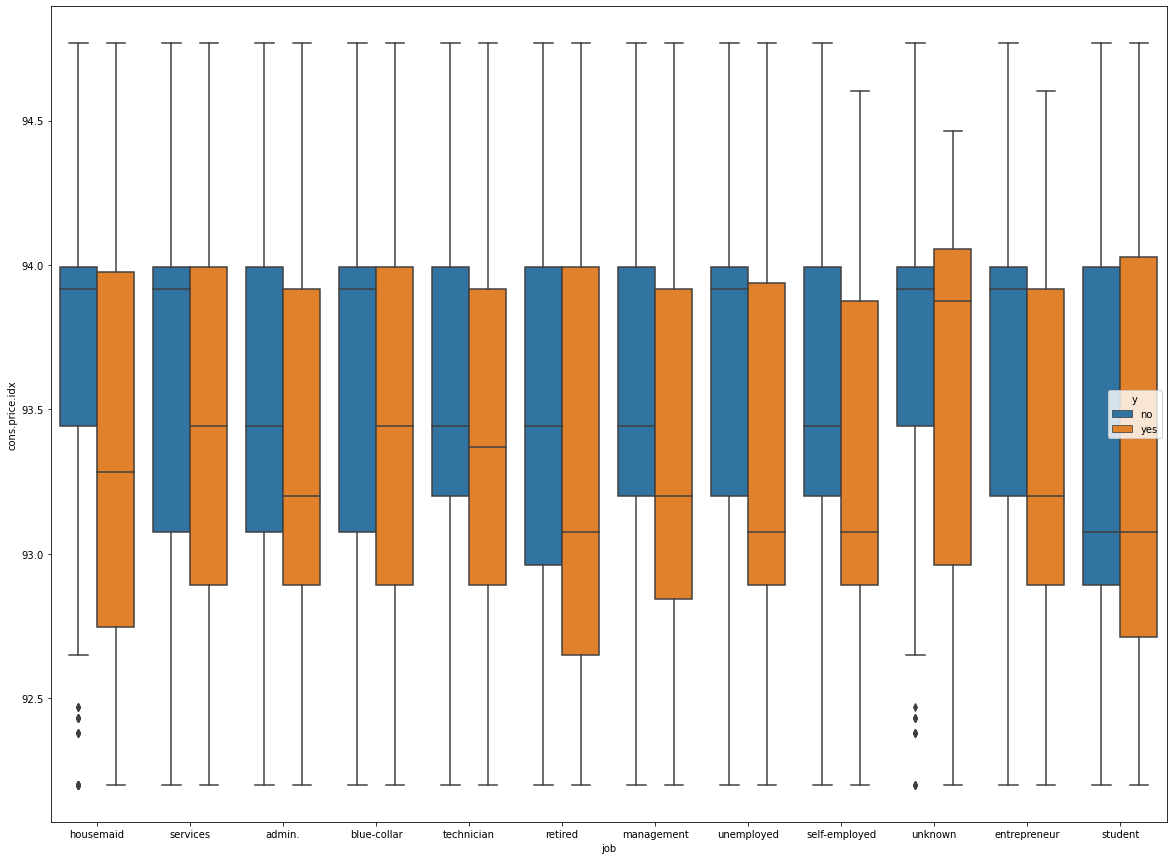

In [11]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df,x='job',y="cons.price.idx", hue="y")

* terdapat data outlier pada jenis pekerjaan housemaid dan unknown berdasarkan cons.price.idx, data outlier tidak begitu besar sehingga tidak perlu ditindaklanjuti
* hubungan antara pekerjaan dan consp.price.idx tidak memiliki pengaruh yang signifikan berdasarkan grafik diatas

<Figure size 2160x1080 with 0 Axes>

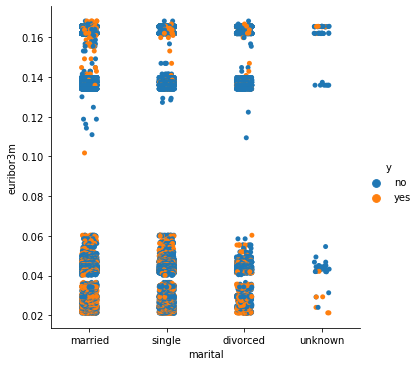

In [12]:
plt.figure(figsize=(30,15))
sns.catplot(data=df,x='marital',y="euribor3m", hue="y")

* nominal euribor3m memiliki kecenderungan  ke satu sisi untuk jenis marital yang diketahui, data unknow tidak memiliki pengaruh cukup signifikan (data unknown pada proses digunakan sebagtai kategori, bukan missing value)
* dengan begitu euribor3m memiliki kecenderungan multicolateral dengan y, walaupun tidak signifikan (kemungkinan skor dibawah 5)

# Data Preprocessing

## Encoding

In [13]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_job = pd.DataFrame(enc.fit_transform(df[['job']]).toarray())
enc_marital = pd.DataFrame(enc.fit_transform(df[['marital']]).toarray())
enc_education = pd.DataFrame(enc.fit_transform(df[['education']]).toarray())
enc_default = pd.DataFrame(enc.fit_transform(df[['default']]).toarray())
enc_housing = pd.DataFrame(enc.fit_transform(df[['housing']]).toarray())
enc_loan = pd.DataFrame(enc.fit_transform(df[['loan']]).toarray())
enc_contact = pd.DataFrame(enc.fit_transform(df[['contact']]).toarray())
enc_poutcome = pd.DataFrame(enc.fit_transform(df[['poutcome']]).toarray())

In [14]:
enc_job.columns = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
enc_marital.columns = ['marital_divorced', 'marital_married', 'marital_single', 'marital_unknown']
enc_education.columns = ['education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown']
enc_default.columns = ['default_no', 'default_unknown', 'default_yes']
enc_housing.columns = ['housing_no', 'housing_unknown', 'housing_yes']
enc_loan.columns = ['loan_no', 'loan_unknown', 'loan_yes']
enc_contact.columns = ['contact_cellular', 'contact_telephone']
enc_poutcome.columns = ['poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

In [15]:
all_dummies = pd.concat([enc_job, enc_marital, enc_education, enc_default, enc_housing, enc_loan, enc_contact, enc_poutcome], axis=1)

In [16]:
df = df.join(all_dummies)

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['y'] = le.fit_transform(df['y'])

Drop yang sudah di encode

In [18]:
df = df.drop(['job','marital' ,'education','default', 'housing', 'loan', 'poutcome', 'contact'], axis=1)

## Variable dataset untuk Cross Validation

Data ini dipersiapkan untuk proses cross validation, yang merupakan keseluruhan dari dataset yang sudah diolah (encode, drop etc), agar data siap untuk dimasukkan kedalam crossval ditahapan selanjutnya

In [19]:
X_val_real = df.drop(['y'], axis=1)
y_val_real = df['y']

In [20]:
X_val_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  float64
 10  job_blue-collar                41188 non-null  float64
 11  job_entrepreneur               41188 non-null  float64
 12  job_housemaid                  41188 non-null 

## Undersampling

Sesuai penjelasan diatas, data skew memiliki kecenderungan hasil model kurang memiliki akurasi yg baik, sehingga dilakukan proses undersampling.

(notes : undersampling sendiri dapat menyebabkan turunnya akurasi namun tetap dilakukan dengan pertimbangan skewness nya terlalu tajam)

<AxesSubplot:>

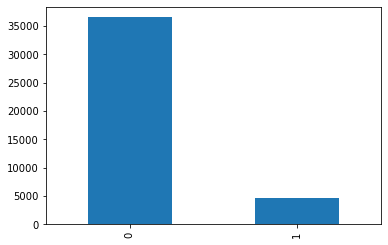

In [21]:
df['y'].value_counts().plot(kind='bar')

In [22]:
#Under-sampling
class0=df[df['y']==0]
class1=df[df['y']==1]
new_data=pd.concat([class0.sample(len(class1),random_state=42),class1],axis=0).reset_index(drop=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            9280 non-null   int64  
 1   campaign                       9280 non-null   int64  
 2   pdays                          9280 non-null   int64  
 3   previous                       9280 non-null   int64  
 4   emp.var.rate                   9280 non-null   float64
 5   cons.price.idx                 9280 non-null   float64
 6   cons.conf.idx                  9280 non-null   float64
 7   euribor3m                      9280 non-null   float64
 8   nr.employed                    9280 non-null   float64
 9   y                              9280 non-null   int32  
 10  job_admin.                     9280 non-null   float64
 11  job_blue-collar                9280 non-null   float64
 12  job_entrepreneur               9280 non-null   f

<AxesSubplot:>

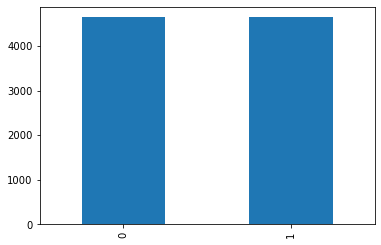

In [23]:
new_data['y'].value_counts().plot(kind='bar')

## Correlation & MultiCorrelation Analysis

<AxesSubplot:>

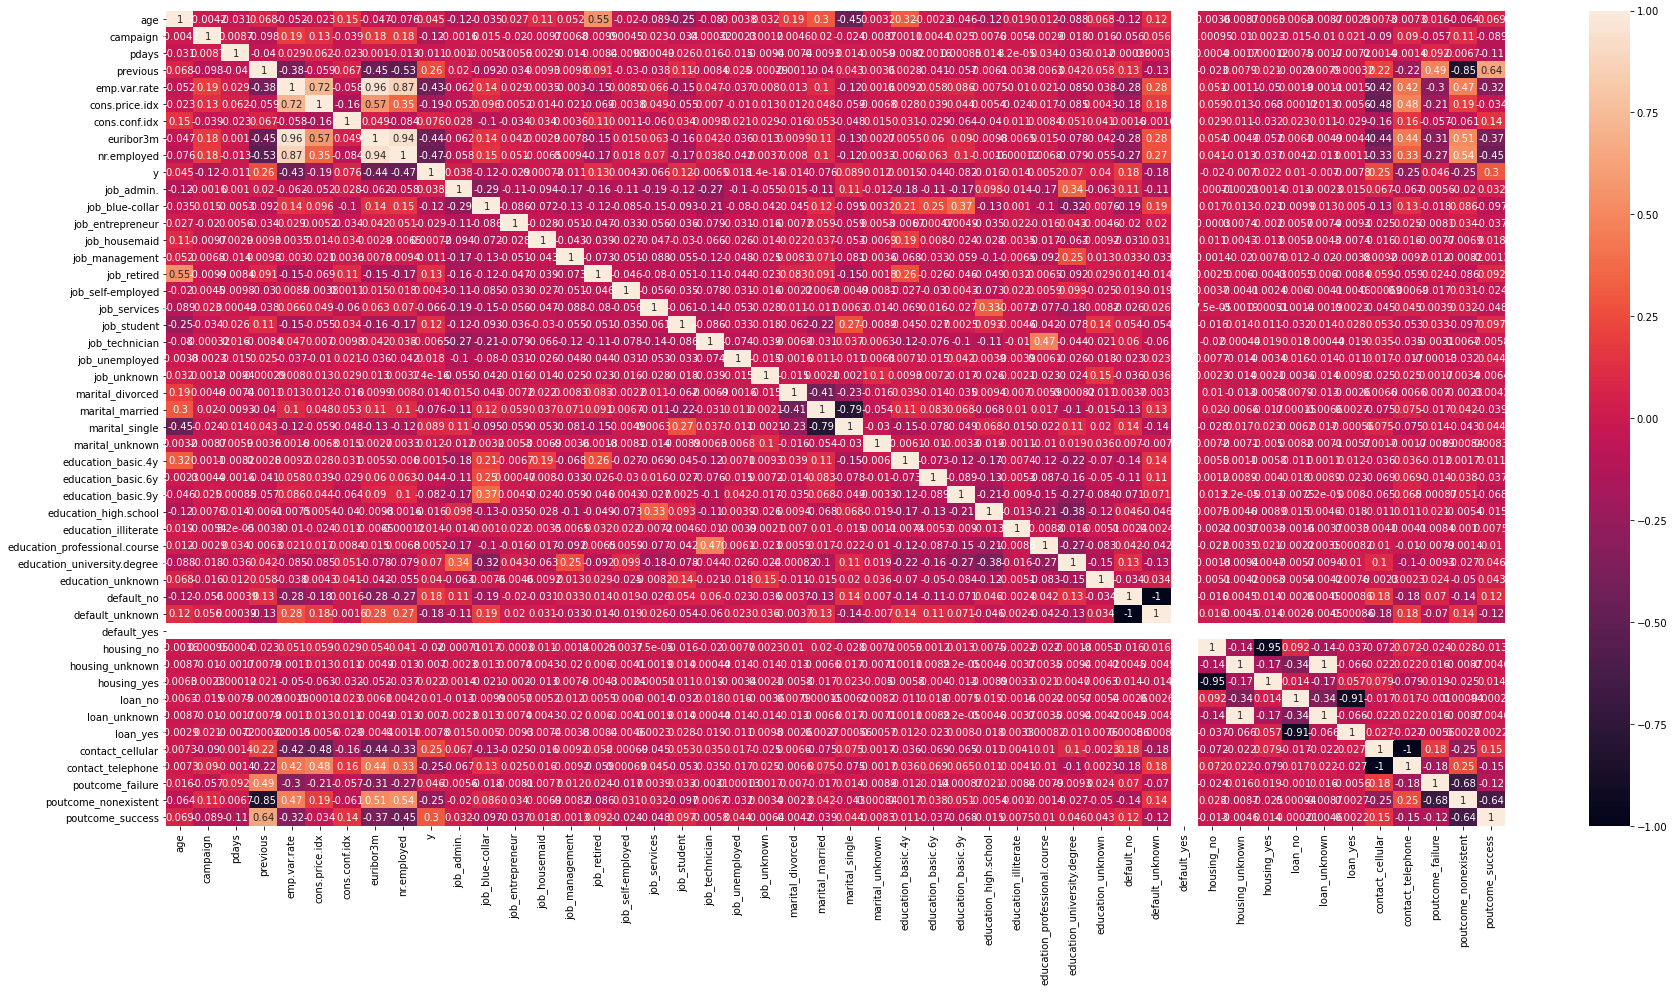

In [24]:
plt.figure(figsize=(30,15))
sns.heatmap(new_data.corr(),annot=True)

Ga usah dibaca, pusing liatnya, fokus kepada warna hitam banyak yg disebabkan karena encoding (satu feature), decision untuk drop feature akan dilakukan dengan multicolinearity test dibawah

(notes : terdapat satu feature encode yang memiliki nilai 0 yaitu default yess yang membuat tabel heatmap mirip bendera denmark)



In [25]:
vif_data = pd.DataFrame()
vif_data["feature"] = new_data.columns
vif_data["VIF"] = [variance_inflation_factor(new_data.values, i) for i in range(len(new_data.columns))]
vif_data

C:\Users\arryp\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\arryp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


feature        VIF
0                             age   2.084864
1                        campaign   1.051212
2                           pdays   1.044718
3                        previous   4.159778
4                    emp.var.rate  35.564501
5                  cons.price.idx  10.495864
6                   cons.conf.idx   2.721037
7                       euribor3m  63.303554
8                     nr.employed  39.774051
9                               y   1.353907
10                     job_admin.        inf
11                job_blue-collar        inf
12               job_entrepreneur        inf
13                  job_housemaid        inf
14                 job_management        inf
15                    job_retired        inf
16              job_self-employed        inf
17                   job_services        inf
18                    job_student        inf
19                 job_technician        inf
20                 job_unemployed        inf
21                    job_unknown        inf
22               marital_divorced        inf
23                marital_married        inf
24                 marital_single        inf
25                marital_unknown        inf
26             education_basic.4y        inf
27             education_basic.6y        inf
28             education_basic.9y        inf
29          education_high.school        inf
30           education_illiterate        inf
31  education_professional.course        inf
32    education_university.degree        inf
33              education_unknown        inf
34                     default_no        inf
35                default_unknown        inf
36                    default_yes        NaN
37                     housing_no        inf
38                housing_unknown        inf
39                    housing_yes        inf
40                        loan_no        inf
41                   loan_unknown        inf
42                       loan_yes        inf
43               contact_cellular        inf
44              contact_telephone        inf
45               poutcome_failure        inf
46           poutcome_nonexistent        inf
47               poutcome_success        inf

berdasarkan data VIF tersebut perlu dilakukan tindakan dengan melakukan drop feature berdasarkan judgement :
* berdasarkan trial and error drop vif euribor3m memiliki pengaruh multicollinearity terhadap target dan nr.employed memiliki multicolinearity dengan cons.price.idx dan cons.conf.idx sehingga di drop
* identifikasi lebih lanjut tidak dapat dilakukan karna deskripsi data pada situs UCI minimum

In [26]:
new_data = new_data.drop(['euribor3m', 'nr.employed', 'default_yes'], axis=1)

Drop juga untuk X_val_real dan y_val_real untuk cross validation

In [27]:
X_val_real = df.drop(['y','euribor3m', 'nr.employed', 'default_yes'], axis=1)
y_val_real = df['y']

In [28]:
vif_data = pd.DataFrame()
vif_data["feature"] = new_data.columns
vif_data["VIF"] = [variance_inflation_factor(new_data.values, i) for i in range(len(new_data.columns))]
vif_data

C:\Users\arryp\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature       VIF
0                             age  2.084280
1                        campaign  1.044957
2                           pdays  1.037893
3                        previous  4.108894
4                    emp.var.rate  3.572050
5                  cons.price.idx  3.200858
6                   cons.conf.idx  1.257989
7                               y  1.353900
8                      job_admin.       inf
9                 job_blue-collar       inf
10               job_entrepreneur       inf
11                  job_housemaid       inf
12                 job_management       inf
13                    job_retired       inf
14              job_self-employed       inf
15                   job_services       inf
16                    job_student       inf
17                 job_technician       inf
18                 job_unemployed       inf
19                    job_unknown       inf
20               marital_divorced       inf
21                marital_married       inf
22                 marital_single       inf
23                marital_unknown       inf
24             education_basic.4y       inf
25             education_basic.6y       inf
26             education_basic.9y       inf
27          education_high.school       inf
28           education_illiterate       inf
29  education_professional.course       inf
30    education_university.degree       inf
31              education_unknown       inf
32                     default_no       inf
33                default_unknown       inf
34                     housing_no       inf
35                housing_unknown       inf
36                    housing_yes       inf
37                        loan_no       inf
38                   loan_unknown       inf
39                       loan_yes       inf
40               contact_cellular       inf
41              contact_telephone       inf
42               poutcome_failure       inf
43           poutcome_nonexistent       inf
44               poutcome_success       inf

## Scalling Data

In [29]:
scaler=StandardScaler()
X=scaler.fit_transform(new_data)

## Pendefinisian Feature dan target

In [30]:
X=new_data.drop(['y'], axis=1)
y=new_data['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Pendefinisan Model

## Grid Search

Grid Search ditentukan terlebih dahulu untuk melakukan pencarian atas parameter terbaik dari set parameter yang telah ditentukan sebagai berikut, dengan catatan :
* C dipilih rendah pada SVC untuk mempertimbangkan speed processing ketika fitting model dan crossval 
* maxdepth DT dan RF juga dibuat kecil untuk mempercepat proses komputasi

In [31]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict


params=[
    {'penalty':['l1','l2'],'solver':['newton-cg','lbfgs']},
    {'C':[0.1,0.5,1,1.5],'kernel':['rbf','sigmoid','linear']},
    {'max_depth':[4,5]},
    {'n_estimators':[50,100],'max_depth':[4,5,6]},
    {'weights':['uniform','distance'],'metric':['euclidean','minkowski']}
    
]

grid=[
    GridSearchCV(LogisticRegression(),params[0],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(SVC(),params[1],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(DecisionTreeClassifier(),params[2],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(RandomForestClassifier(),params[3],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(KNeighborsClassifier(),params[4],scoring='accuracy',cv=5,n_jobs=10),
]

for g in grid:
    g.fit(X_train,y_train)

C:\Users\arryp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.73291242 0.72352235]
  warnings.warn(


## Model + best parameter dari GridSearch

Hasil dari GridSearch digunakan sebagai parameter pada model yang didefinisikan dibawah ini

In [32]:
models=[
    LogisticRegression(penalty=grid[0].best_params_['penalty'],solver=grid[0].best_params_['solver'],fit_intercept=True),
    SVC(C=grid[1].best_params_['C'],kernel=grid[1].best_params_['kernel'],probability=True),
    DecisionTreeClassifier(max_depth=grid[2].best_params_['max_depth']),
    RandomForestClassifier(n_estimators=grid[3].best_params_['n_estimators'],max_depth=grid[3].best_params_['max_depth']),
    KNeighborsClassifier(weights=grid[4].best_params_['weights'],metric=grid[4].best_params_['metric']),
    GaussianNB(),
    ]
   
for mod in models:
    mod.fit(X_train,y_train)
    

# Evaluasi Model

## Visualisasi skor akurasi

In [33]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score
import matplotlib.pyplot as plt

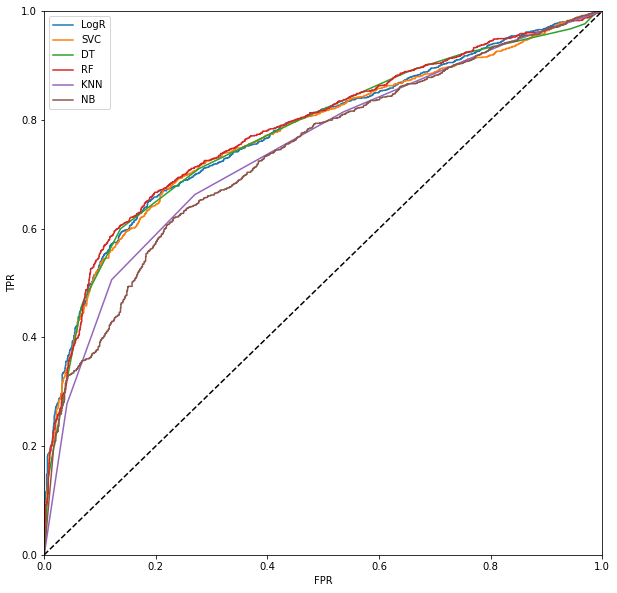

In [34]:
y_pred1=[mod.predict(X_test) for mod in models]
scores1=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores1]
#roc_auc_scores=[roc_auc_score(y_pred1[i],scores1[i],multi_class='ovo') for i in range(len(models))]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['LogR','SVC','DT','RF','KNN','NB']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(new_data.y.unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [35]:
class_report.transpose()

precision    recall        f1  support
LogR_0   0.701995  0.806013  0.750417   1397.0
LogR_1   0.770339  0.655371  0.708220   1387.0
SVC_0    0.708361  0.770222  0.737997   1397.0
SVC_1    0.746245  0.680606  0.711916   1387.0
DT_0     0.684838  0.863278  0.763775   1397.0
DT_1     0.813294  0.599856  0.690456   1387.0
RF_0     0.708199  0.785254  0.744739   1397.0
RF_1     0.757085  0.674117  0.713196   1387.0
KNN_0    0.685484  0.730136  0.707106   1397.0
KNN_1    0.709105  0.662581  0.685054   1387.0
NB_0     0.608566  0.874732  0.717768   1397.0
NB_1     0.774485  0.433309  0.555710   1387.0

In [36]:
df['y'].unique()

array([0, 1])

Berdaasarkan hasil test berikut, preferensi model yang akan dipilih jatuh kepada RF yang berhasil memberikan nilai F1 score sebesar 74% untuk prediksi target 0 (no) dan sebesar 71% untuk prediksi target (yes) skor tersebut tertinggi dari model lainnya diduga dikarenakan hal berikut :
*  dibandingkan dari ke 6 model, random forest memiliki hasil yang bisa dipastikan jauh lebih baik namun terdapat kemungkinan bias lebih besar apabila tidak di tuning dengan baik 
*  Random forest dapat di running secara paralel dan tidak diperlukan normalisasi

Namun terdapat pertimbangan lain untuk tidak memilih random forest dikarenakan random forest tidak dapat dijalankan pada data yang cenderung linear, namun karena dataset telah diolah sedemikiran rupa dan target memiliki kecenderungan skew, maka Random Forest dapat dipilih dan digunakan untuk dataset ini

## Cross Validation

Berikut seluruh model berikut dengan hyper parameter yang akan digunakan pada proses cross validation 

In [37]:
models

[LogisticRegression(solver='newton-cg'),
 SVC(C=0.1, kernel='linear', probability=True),
 DecisionTreeClassifier(max_depth=4),
 RandomForestClassifier(max_depth=6, n_estimators=50),
 KNeighborsClassifier(metric='euclidean'),
 GaussianNB()]

In [38]:
Modlist = ['LogReg', 'SVC', 'DTree', 'RF', 'KNN', 'NB'] 

In [39]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [40]:
kf=KFold(n_splits=5)

In [41]:
scaler=StandardScaler()
X=scaler.fit_transform(X_val_real)
for mod in models:
    z = cross_val_score(mod, X, y_val_real, scoring='accuracy', cv=kf, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(z), std(z)))
    

Accuracy: 0.889 (0.098)
Accuracy: 0.886 (0.101)
Accuracy: 0.888 (0.100)
Accuracy: 0.887 (0.101)
Accuracy: 0.885 (0.099)
Accuracy: 0.814 (0.148)


# other model 

Model yg dipilih pada other model adalah HistGradientBoosting yang termasuk dalam keluarga Gradient boosting yang dikenal dengan tingginya nilai akurasi, mari kita coba dengan data train yg sama dengan data diatas

## GridSearch Parameter & Defining Model

In [42]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

params1=[
    {'learning_rate':[0.1,0.5, 1], 'max_depth':[3,4,5], 'l2_regularization' :[1,0]}
]
    
grid1=[
    GridSearchCV(HistGradientBoostingClassifier(),params1[0],scoring='accuracy',cv=5,n_jobs=10)
]

for g in grid1:
    g.fit(X_train,y_train)

Sesuai dengan marking diatas dan keterangan dari [Meong](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier), HGBoost masih dalam tahapan experimental

## GridSearch

In [43]:
models1=[
    HistGradientBoostingClassifier(learning_rate=grid1[0].best_params_['learning_rate'], max_depth=grid1[0].best_params_['max_depth'], l2_regularization=grid1[0].best_params_['l2_regularization'])
]
for mod in models1:
    mod.fit(X_train,y_train)


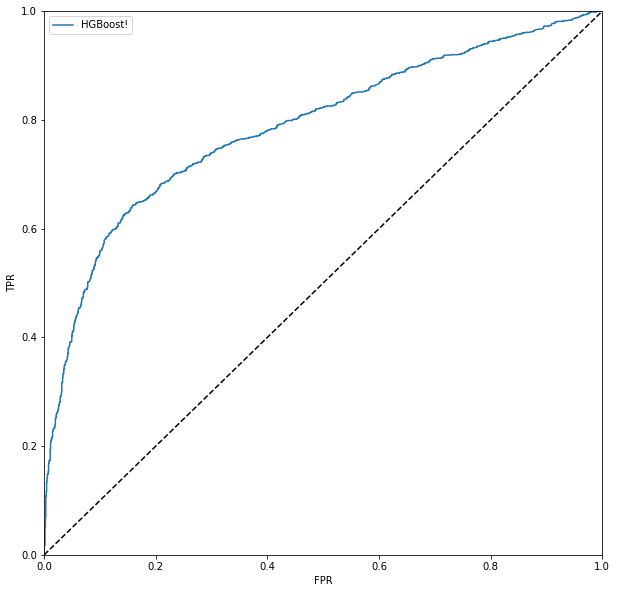

In [44]:
y_pred1=[mod.predict(X_test) for mod in models1]
scores1=[mod.predict_proba(X_test)[:,1] for mod in models1]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores1]
#roc_auc_scores=[roc_auc_score(y_pred1[i],scores1[i],multi_class='ovo') for i in range(len(models))]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['HGBoost!']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(new_data.y.unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(10,10))
for i in range(len(models1)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [45]:
class_report.transpose()

precision    recall        f1  support
HGBoost!_0   0.698124  0.852541  0.767644   1397.0
HGBoost!_1   0.808905  0.628695  0.707505   1387.0

Hasil menunjukan skor yang cukup baik berdasarkan f1 skor, lebih baik dibandingkan dengan Random Forest yang ada di 6 model pertama 

## Cross Validation

In [46]:
scaler=StandardScaler()
X=scaler.fit_transform(X_val_real)
for mod in models1:
    z = cross_val_score(mod, X, y_val_real, scoring='accuracy', cv=kf, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(z), std(z)))

Accuracy: 0.893 (0.090)


HGBoost! the winner! HG Boost memiliki akurasi cross validation yang tinggi dibandingnkan dengan ke 6 model lainnya, rumornya betuuul

# Model Inference

## Data baru untuk Model Inference

data inference dibuat terpisah pada excel yang telah dibuat dan telah disesuaikan dengan panjang feature pada saat dilakukannnya proses training

In [47]:
data_inference = pd.read_excel('data/bank-additional/inference.xlsx')

In [48]:
models

[LogisticRegression(solver='newton-cg'),
 SVC(C=0.1, kernel='linear', probability=True),
 DecisionTreeClassifier(max_depth=4),
 RandomForestClassifier(max_depth=6, n_estimators=50),
 KNeighborsClassifier(metric='euclidean'),
 GaussianNB()]

In [49]:
for mod in models:
    hasil = mod.predict(data_inference)
    print(hasil)

[0]
[0]
[0]
[0]
[0]
[0]


In [50]:
models1

[HistGradientBoostingClassifier(l2_regularization=1, max_depth=3)]

In [51]:
for mod in models1:
    hasil = mod.predict(data_inference)
    print(hasil)

[0]


Semua berhasil menebak dengan hasil yang sama yaitu 0 (Tidak akan menjadi konsumen)

# Kesimpulan

kesimpulan atas proses penggunaan ke 7 model diatas atas kepada data telemarketing sebagai berikut : 

Data Analysist : 
* Data memiliki karakteristik imbalance classification dimana beberapa feature dan khususnya target memiliki kecenderungan skewness ke satu sisi sehingga data tidak ideal itu digunakan secara langsung didalam pelatihan model, sehingga perlu dilakukan tindakan seperti undersampling pada feature dan manipulasi data pada feature pdays dengan menggunakan cara replace value mean untuk data value 999
* beberapa data bertindak sebagai strong predictor namun hubungan lebih jauh antar data tidak dapat di identifikasi karna kurangnya informasi pada kolom feature

Overall skor modelling memiliki nilai f1  yang cukup baik, dengan selisih antar model yang tidak terlalu jauh berbeda terutama pada saat proses crossvalidation
berikut Model Analysist :
* Parameter Tuning memberikan dampak positif terhadap kesiapan model dalam melakukan testtinng keseluruhan data pada Cross Validation, terlihat dari skor akurasi yang meningkat pada tahapan cross validation dan ketika menghadapi data baru yagn dilakukan pada tahapan Model Inference
* Logistic regression memiliki akurasi yang rendah dibandingkan dengan ke 6 model lainnya, logistic Regression merupakan model yang memiliki tingkat sensiitifitas tinggi terhadap dataset tertentu, sehingga pada tahapan testing f1score kecil
* Decision Tree dan Random Forest memiliki kesamaan pola dalam melakukan pembentukan algoritma, dimana Random Forest merupakan kumpulan dari "kelompok" decision Tree, apabila karakteristik data train lebih random atau cenderung skew, Random Forest dan Decision tree akan bekerja jauh lebih baik, limitasi dari depth juga mempengaruhi hasil (max depth dibatasi pada kedalaman tertentu untuk mengurangi waktu komputasi :') )
* SVC telah bekerja dengan baik dikarenakan data sudah cukup terstruktur, sehingga garis pemisah (hyperplane) lebih mudah terbentuk dan dataset telah memiliki multicolinearity yang rendah
* KNN bekerja jauh lebih baik apabila fitur yang diberikan homogen, dataset ini memiliki feature yg cukup beragam dengan "skala" dan "weight" yang memiliki perbedaan antara satu fitur dengan yg lain
* Naive bayes memiliki kekurangan dalam "zero frequency" , yang artinya apabila terdapat kategori dalam suatu fitur namun tidak memiliki value maka Naive bayes tidak dapat memberikan hasil prediksi dari data tersebut, sehingga data menjadi meaningless, fitur diatas memiliki banyak data yg binary dengan kebanyakan input di 0

The King:
> HistGradientBoosting relatif baru didalam model jika dibandingkan dengan data lainnya, model ini jg masih dalam kategori experimental namun secara umum hasil prediksi akurasi untuk hampir semua dataset memiliki hasil yg paling baik, fleksibilitas dari model terhadap dataset juga tinggi dengan opsi hyperparameter yang banyak (kurang di explor karena keterbatasan waktu), dan less painful untuk digunakan karna tidak memerlukan proses preprocessing (tetep dilakukan dalam data ini karna takut ada yagn error)
